In [3]:
import os
import numpy as np
import pandas as pd
import struct
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

#### Functions to load Training Data and Testing Data

In [4]:
def load_training_data():
    f_image = open('../data/train-images-idx3-ubyte', 'rb')
    f_label = open('../data/train-labels-idx1-ubyte', 'rb')
    
    magic_number, size, row, column = struct.unpack(">IIII", f_image.read(16))
    image_data = np.fromfile(f_image, dtype=np.uint8)
    print("Training Image Data:")
    print(magic_number, size, row, column)
    print(image_data.shape, '\n')
    
    magic_number, size = struct.unpack(">II", f_label.read(8))    
    image_label = np.fromfile(f_label, dtype=np.uint8)
    print("Training Image Label:")
    print(magic_number, size)
    print(image_label.shape, '\n')
    
    image_data = np.array(image_data).reshape((size, row, column))
    return image_data, image_label


def load_testing_data():
    f_image = open('../data/t10k-images-idx3-ubyte', 'rb')
    f_label = open('../data/t10k-labels-idx1-ubyte', 'rb')
    
    magic_number, size, row, column = struct.unpack(">IIII", f_image.read(16))
    image_data = np.fromfile(f_image, dtype=np.uint8)
    print("Testing Image Data:")
    print(magic_number, size, row, column)
    print(image_data.shape, '\n')
    
    magic_number, size = struct.unpack(">II", f_label.read(8))    
    image_label = np.fromfile(f_label, dtype=np.uint8)
    print("Testing Image Label:")
    print(magic_number, size)
    print(image_label.shape, '\n')
    
    image_data = np.array(image_data).reshape((size, row, column))
    return image_data, image_label

#### Loading Training and Testing Data

In [5]:
train_image_data, train_image_label = load_training_data()
test_image_data, test_image_label = load_testing_data()

Training Image Data:
2051 60000 28 28
(47040000,) 

Training Image Label:
2049 60000
(60000,) 

Testing Image Data:
2051 10000 28 28
(7840000,) 

Testing Image Label:
2049 10000
(10000,) 



9


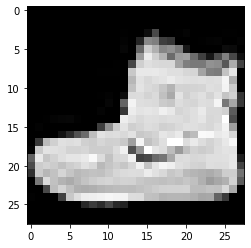

In [6]:
plt.imshow(train_image_data[0], cmap='gray');
print(train_image_label[0])

7


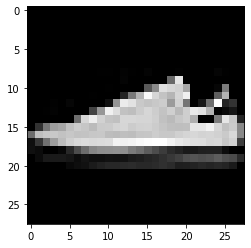

In [7]:
plt.imshow(train_image_data[6], cmap='gray');
print(train_image_label[6])

0


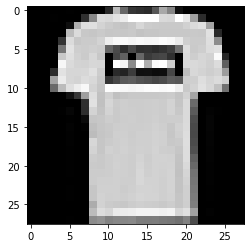

In [8]:
plt.imshow(train_image_data[1], cmap='gray');
print(train_image_label[1])

0


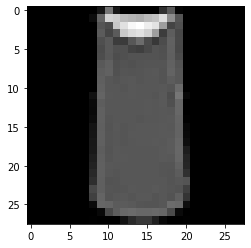

In [9]:
plt.imshow(train_image_data[2], cmap='gray');
print(train_image_label[2])

# Q3 (Section-C)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [12]:
train_image, valid_image, train_label, valid_label = train_test_split(train_image_data, train_image_label, test_size=0.15) 

In [13]:
print(train_image.shape)
print(valid_image.shape)
print(train_label.shape)
print(valid_label.shape)

(51000, 28, 28)
(9000, 28, 28)
(51000,)
(9000,)


In [18]:
mlp = MLPClassifier(hidden_layer_sizes=(256,32), activation='logistic', batch_size=500, max_iter=1)

nsamples, nrows, ncols = train_image.shape
mlp.fit(train_image.reshape((nsamples, nrows*ncols)), train_label)

print("Accurcay on Training Set: ", end=' ')
nsamples, nrows, ncols = train_image.shape
print(mlp.score(train_image.reshape((nsamples, nrows*ncols)), train_label))

print("Accurcay on Validation Set: ", end=' ')
nsamples, nrows, ncols = valid_image.shape
print(mlp.score(valid_image.reshape((nsamples, nrows*ncols)), valid_label))

print("Accurcay on Testing Set: ", end=' ')
nsamples, nrows, ncols = test_image_data.shape
print(mlp.score(test_image_data.reshape((nsamples, nrows*ncols)), test_image_label))

Accurcay on Training Set:  0.7569019607843137
Accurcay on Validation Set:  0.7573333333333333
Accurcay on Testing Set:  0.75


In [26]:
# Get all the label classes
pd.Series(train_image_label).unique()

array([9, 0, 3, 2, 7, 5, 1, 6, 4, 8], dtype=uint8)

## Part (a)

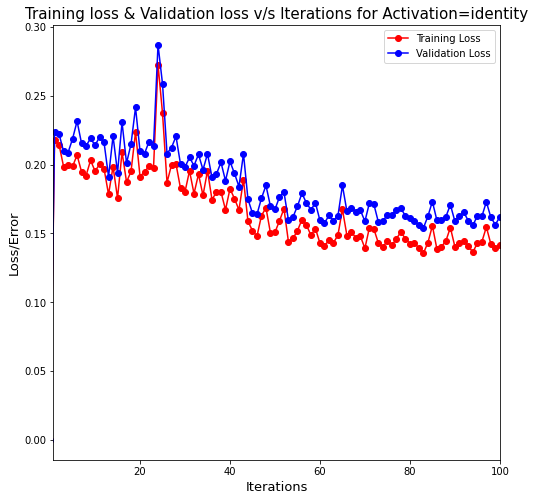

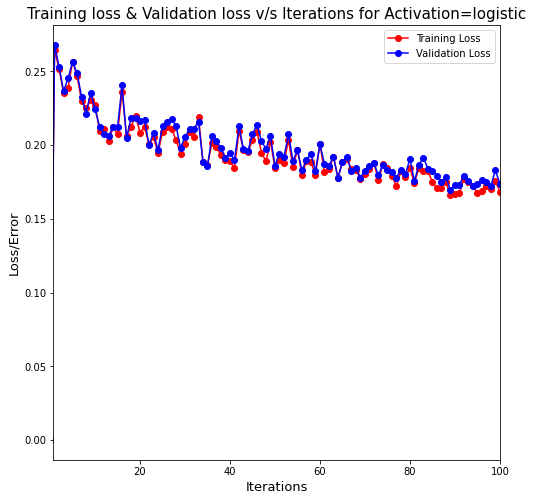

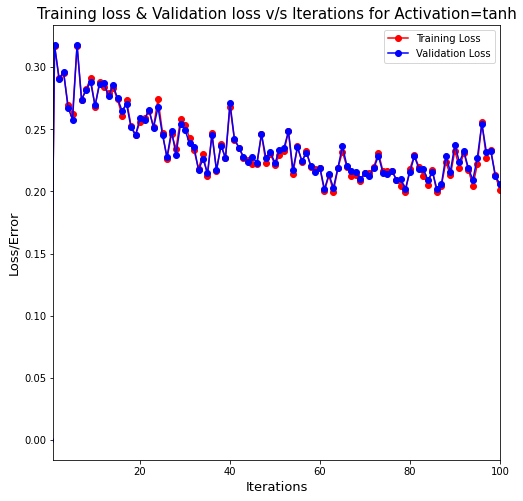

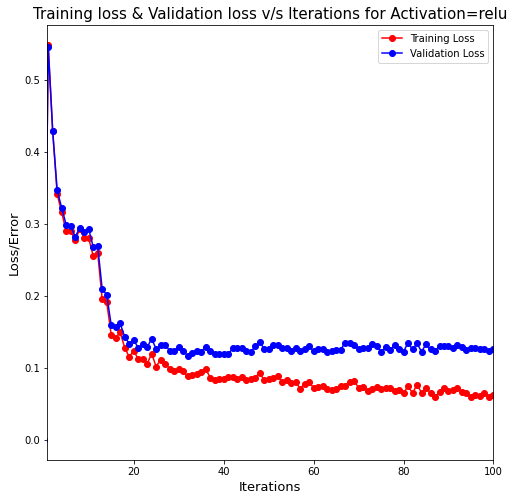

In [39]:
def MLP_activations(activation:str, epochs, batch_size, x_train, y_train, x_valid, y_valid):
    train_loss, validation_loss = [0], [0]

    mlp = MLPClassifier(hidden_layer_sizes=(256,32), activation=activation)
    
    for epoch in range(epochs):
        for batch in range(0, x_train.shape[0], batch_size):
            x_batch = x_train[batch:batch+batch_size]
            y_batch = y_train[batch:batch+batch_size]
            nsamples, nrows, ncols = x_batch.shape
            mlp.partial_fit(x_batch.reshape((nsamples, nrows*ncols)), y_batch, classes=np.arange(10))

        nsamples, nrows, ncols = x_train.shape
        train_loss.append(1 - mlp.score(x_train.reshape((nsamples, nrows*ncols)), y_train))

        nsamples, nrows, ncols = x_valid.shape
        validation_loss.append(1 - mlp.score(x_valid.reshape((nsamples, nrows*ncols)), y_valid))

    plt.figure(figsize=(8,8))
    plt.plot(train_loss, 'r-o', label='Training Loss')
    plt.plot(validation_loss, 'b-o', label='Validation Loss')
    plt.xlabel('Iterations',fontsize=13)
    plt.ylabel('Loss/Error',fontsize=13)
    plt.xlim((0.75,epochs))
    plt.title(f'Training loss & Validation loss v/s Iterations for Activation={activation}',fontsize=15)
    plt.legend()   
    plt.show()

epochs = 100
batch_size = 500
for activation in ['identity', 'logistic', 'tanh', 'relu']:
    MLP_activations(activation, epochs, batch_size, train_image, train_label, valid_image, valid_label)

## Part (b)

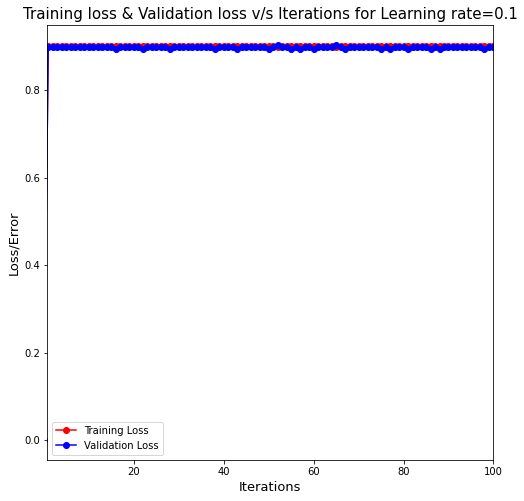

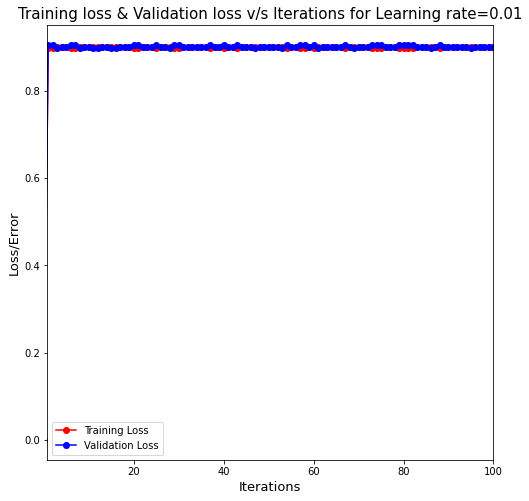

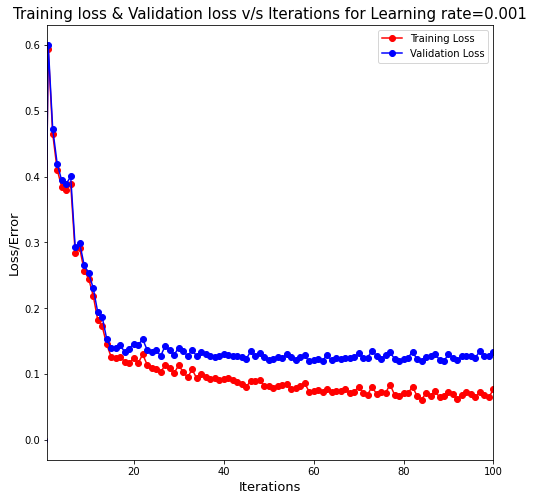

In [41]:
def MLP_learning_rate(lr:int, epochs, batch_size, x_train, y_train, x_valid, y_valid):
    train_loss, validation_loss = [0], [0]
    
    mlp = MLPClassifier(hidden_layer_sizes=(256,32), activation='relu', learning_rate_init=lr)
    
    for epoch in range(epochs):
        for batch in range(0, x_train.shape[0], batch_size):
            x_batch = x_train[batch:batch+batch_size]
            y_batch = y_train[batch:batch+batch_size]
            nsamples, nrows, ncols = x_batch.shape
            mlp.partial_fit(x_batch.reshape((nsamples, nrows*ncols)), y_batch, classes=np.arange(10))
            
        nsamples, nrows, ncols = x_train.shape
        train_loss.append(1 - mlp.score(x_train.reshape((nsamples, nrows*ncols)), y_train))

        nsamples, nrows, ncols = x_valid.shape
        validation_loss.append(1 - mlp.score(x_valid.reshape((nsamples, nrows*ncols)), y_valid))

    plt.figure(figsize=(8,8))
    plt.plot(train_loss, 'r-o', label='Training Loss')
    plt.plot(validation_loss, 'b-o', label='Validation Loss')
    plt.xlabel('Iterations', fontsize=13)
    plt.ylabel('Loss/Error', fontsize=13)
    plt.xlim((0.75,epochs))
    plt.title(f'Training loss & Validation loss v/s Iterations for Learning rate={lr}', fontsize=15)
    plt.legend()
    plt.show()

epochs = 100
batch_size = 500
for lr in [0.1, 0.01, 0.001]:
    MLP_learning_rate(lr, epochs, batch_size, train_image, train_label, valid_image, valid_label)

## Part (c)

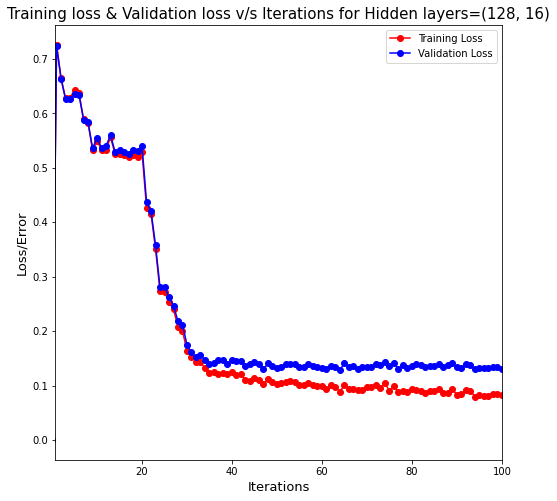

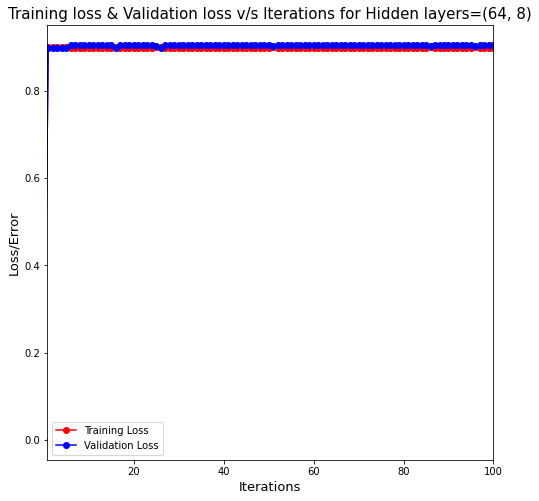

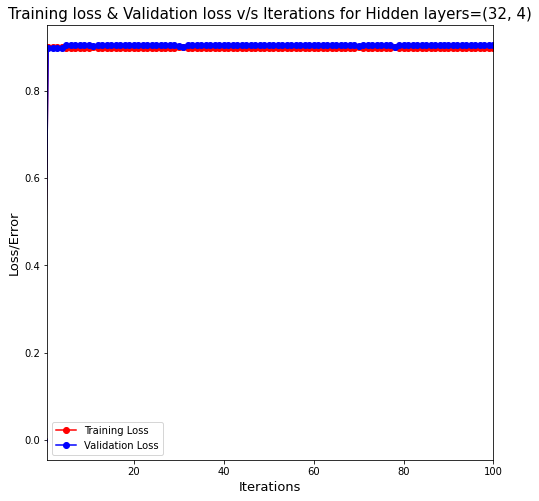

In [42]:
def MLP_hidden_layers(hidden_layer, epochs, batch_size, x_train, y_train, x_valid, y_valid):
    train_loss, validation_loss = [0], [0]
    
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer, activation='relu', learning_rate_init=0.001)

    for epoch in range(epochs):
        for batch in range(0, x_train.shape[0], batch_size):
            x_batch = x_train[batch:batch+batch_size]
            y_batch = y_train[batch:batch+batch_size]
            nsamples, nrows, ncols = x_batch.shape
            mlp.partial_fit(x_batch.reshape((nsamples, nrows*ncols)), y_batch, classes=np.arange(10))

        nsamples, nrows, ncols = x_train.shape
        train_loss.append(1 - mlp.score(x_train.reshape((nsamples, nrows*ncols)), y_train))

        nsamples, nrows, ncols = x_valid.shape
        validation_loss.append(1 - mlp.score(x_valid.reshape((nsamples, nrows*ncols)), y_valid))

    plt.figure(figsize=(8,8))
    plt.plot(train_loss, 'r-o', label='Training Loss')
    plt.plot(validation_loss, 'b-o', label='Validation Loss')
    plt.xlabel('Iterations', fontsize=13)
    plt.ylabel('Loss/Error', fontsize=13)
    plt.xlim((0.75,epochs))
    plt.title(f'Training loss & Validation loss v/s Iterations for Hidden layers={hidden_layer}', fontsize=15)
    plt.legend()
    plt.show()

epochs = 100
batch_size = 500
for hidden_layer in ((128,16), (64,8), (32,4)):
    MLP_hidden_layers(hidden_layer, epochs, batch_size, train_image, train_label, valid_image, valid_label)

## Part (d)